# Proyecto_X_NLP – EDA del dataset de comentarios de YouTube

En este notebook realizamos el **Análisis Exploratorio de Datos (EDA)** del dataset `youtoxic_english_1000.csv`:

- Cargar y revisar la estructura del dataset.
- Comprobar tipos de datos, nulos y duplicados.
- Analizar propiedades básicas del texto (longitud, número de palabras).
- Explorar la distribución de las etiquetas de toxicidad / discurso de odio.
- Investigar relaciones sencillas entre longitud del texto y toxicidad general (`IsToxic`).

> 🔎 Nota: Aquí **no aplicamos** tokenización, stopwords, stemming ni lematización.
> Esas transformaciones se aplicarán en el notebook de preprocesamiento,
> para no alterar la visión de los datos originales durante el análisis exploratorio.

Este análisis nos permitirá entender mejor el problema antes de diseñar el preprocesamiento y los modelos.

> ⚠️ **Aviso:** el dataset contiene comentarios con lenguaje ofensivo y de odio. Es parte del problema que queremos resolver, pero conviene tenerlo en cuenta.


### Paso 1: Importar librerías y configurar el entorno

En este paso importamos las librerías necesarias para el EDA y configuramos algunas opciones de visualización.

- Importar las librerías principales que utilizaremos para el EDA y el preprocesamiento.
- Configurar algunas opciones de visualización de `pandas`.
- Dejar preparada la ruta al fichero CSV del dataset.


In [7]:
# Paso 1: Import libraries and basic configuration

import pandas as pd                      # Data manipulation and analysis with DataFrames
import numpy as np                       # Numerical operations and basic statistics
import matplotlib.pyplot as plt          # Base plotting library (lines, bars, histograms, etc.)
import seaborn as sns                    # High-level statistical visualizations on top of matplotlib
import re                                # Regular expressions (useful for text patterns if needed)
from IPython.display import Markdown, display  # To display formatted Markdown explanations from code cells

# Configure plotting style
sns.set(style="whitegrid")

# Configure pandas display options
pd.set_option("display.max_colwidth", 200)   # Show more characters in text columns without truncation
pd.set_option("display.max_columns", 50)     # Allow displaying many columns

# Path to the dataset (adjust to your repository structure if needed)
DATA_PATH = "data/youtoxic_english_1000.csv"

display(Markdown(
"**Salida:** Esta celda importa las librerías necesarias, configura el entorno y define la ruta al fichero de datos; todavía no se muestran datos."
))


**Salida:** Esta celda importa las librerías necesarias, configura el entorno y define la ruta al fichero de datos; todavía no se muestran datos.

## Paso 2: Cargar el dataset y visualizar las primeras filas

En esta celda vamos a:

- Leer el fichero CSV (`youtoxic_english_1000.csv`) en un DataFrame de `pandas`.
- Ver las primeras filas con `head()` para hacernos una idea de la estructura de los datos.
- Comprobar el número de filas y columnas.
- Listar el nombre de las columnas.


In [16]:
# Paso 2: Load the dataset and inspect the first rows
DATA_PATH = "../../data/youtoxic_english_1000.csv"

df = pd.read_csv(DATA_PATH)  # Load CSV into a pandas DataFrame

# Show the first rows to understand the structure
display(df.head())

# Basic dataset size information
num_rows, num_cols = df.shape
print(f"\nNúmero de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")
print("\nNombre de las columnas:")
print(df.columns.tolist())

display(Markdown(
"""
**Explicación de la salida:**

- La tabla muestra las primeras filas del dataset con columnas como:
  - `CommentId`, `VideoId`, `Text` (identificadores y texto del comentario).
  - Varias columnas booleanas `Is...` (`IsToxic`, `IsAbusive`, etc.) que representan distintos tipos de toxicidad/odio.
- También vemos:
  - Número total de filas y columnas.
  - Lista completa de nombres de columnas.

Con esto tenemos una primera visión clara de qué información contiene el dataset y cuáles serán
las columnas de texto y etiquetas para el modelado.
"""
))


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,"If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation. To lump yourself into this mess and take matt...",False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to apprehend. They are trained to shoot to kill. And I thank Wilson for killing that punk bitch.,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' banners being held by white cunts is kinda patronizing and ironically racist. could they have not come up with somethin better.. or is it just what w...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers i...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should have not been shot 6 extra time. Shoot him once if hes attacking you and that would stop his attack. Shoot him twice if he's still attacking you, but s...",False,False,False,False,False,False,False,False,False,False,False,False



Número de filas: 1000
Número de columnas: 15

Nombre de las columnas:
['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']



**Explicación de la salida:**

- La tabla muestra las primeras filas del dataset con columnas como:
  - `CommentId`, `VideoId`, `Text` (identificadores y texto del comentario).
  - Varias columnas booleanas `Is...` (`IsToxic`, `IsAbusive`, etc.) que representan distintos tipos de toxicidad/odio.
- También vemos:
  - Número total de filas y columnas.
  - Lista completa de nombres de columnas.

Con esto tenemos una primera visión clara de qué información contiene el dataset y cuáles serán
las columnas de texto y etiquetas para el modelado.


## Paso 3: Información general del dataset (dtypes, nulos)

En esta celda:

- Revisaremos los tipos de datos de cada columna (`info()`).
- Comprobaremos si hay valores nulos (`isna().sum()`).
- Empezaremos a identificar qué columnas serán:
  - Features de entrada (texto).
  - Etiquetas objetivo (columnas booleanas de toxicidad / odio).

Esto nos permite ver si:
- Hay columnas mal tipadas.
- Debemos tratar valores faltantes antes de seguir.

In [23]:
# Paso 3: Check data types and missing values

from io import StringIO # Standard library to work with in-memory text buffers

info_buffer = StringIO()
df.info(buf=info_buffer)           # Write df.info output into the buffer instead of printing
info_text = info_buffer.getvalue() # Get the text as a string

print("=== Información del DataFrame ===")
df.info()
print("\n=== Valores nulos por columna ===")
print(df.isna().sum())

display(Markdown(
"""
**Explicación de la salida:**

- `df.info()` nos muestra:
  - El número de filas.
  - El tipo de dato de cada columna (`object` para texto/IDs, `bool` para las etiquetas `Is...`).
- La tabla de nulos (`df.isna().sum()`) indica cuántos valores faltantes hay por columna.

En este dataset, las columnas suelen venir bien tipadas y sin valores nulos, lo que simplifica el preprocesamiento.
"""
))


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB

=== Valores nulos por columna ===
CommentId


**Explicación de la salida:**

- `df.info()` nos muestra:
  - El número de filas.
  - El tipo de dato de cada columna (`object` para texto/IDs, `bool` para las etiquetas `Is...`).
- La tabla de nulos (`df.isna().sum()`) indica cuántos valores faltantes hay por columna.

En este dataset, las columnas suelen venir bien tipadas y sin valores nulos, lo que simplifica el preprocesamiento.


## Paso 4: Comprobación de duplicados

Es importante saber si:

- Hay comentarios exactamente duplicados.
- Existen posibles duplicados en el texto (`Text`) que podrían sesgar el modelo.

En esta celda vamos a:

- Contar el número de filas duplicadas completas.
- Contar el número de textos duplicados en la columna `Text`.


In [26]:
# Paso 4: Check for duplicated rows and duplicated texts

# Completely duplicated rows (all columns identical)
num_duplicated_rows = df.duplicated().sum()

# Duplicated texts (same comment text, regardless of other columns)
num_duplicated_texts = df["Text"].duplicated().sum()

print(f"Número de filas completamente duplicadas: {num_duplicated_rows}")
print(f"Número de textos duplicados en 'Text': {num_duplicated_texts}")

# Count how many times each text appears
text_counts = df["Text"].value_counts()

# Select only texts that appear more than once (repeated comments)
repeated_texts_counts = text_counts[text_counts > 1]

print("\nNúmero de textos distintos que se repiten (aparecen más de una vez):", len(repeated_texts_counts))

# Show the top repeated texts with their counts
print("\nTop 10 textos repetidos:")
display(repeated_texts_counts.head(10).to_frame(name="count"))

# Show a few example rows for repeated texts (to see context: ids, labels, etc.)
duplicated_text_rows = df[df["Text"].isin(repeated_texts_counts.index)].copy()
duplicated_text_rows = duplicated_text_rows.sort_values("Text")

print("\nEjemplos de filas con textos repetidos (primeras 20 filas):")
display(duplicated_text_rows.head(20))

display(Markdown(
"""
**Explicación de la salida:**

- Primero se muestra:
  - `Número de filas completamente duplicadas`: registros idénticos en todas sus columnas.
  - `Número de textos duplicados en 'Text'`: cuántas filas tienen un texto que ya había aparecido antes.
- Luego se calcula cuántos textos distintos se repiten:
  - `Número de textos distintos que se repiten` indica cuántos comentarios *diferentes* aparecen al menos dos veces.
- La tabla **"Top 10 textos repetidos"** muestra:
  - El texto del comentario.
  - La columna `count` con el número de veces que aparece en el dataset.
- Finalmente, se muestran algunas filas de ejemplo (`primeras 20 filas`) que contienen textos repetidos,
  incluyendo sus identificadores (`CommentId`, `VideoId`) y etiquetas `Is...`.

Esta información nos ayuda a:
- Detectar posibles duplicados “reales” (copias exactas del mismo comentario).
- Ver si ciertos mensajes de odio se repiten muchas veces (lo que podría sesgar el entrenamiento).
- Decidir más adelante si eliminar duplicados o mantenerlos según el contexto.
"""
))


Número de filas completamente duplicadas: 0
Número de textos duplicados en 'Text': 3

Número de textos distintos que se repiten (aparecen más de una vez): 2

Top 10 textos repetidos:


,count
Text,
run them over,3
RUN THEM OVER,2



Ejemplos de filas con textos repetidos (primeras 20 filas):


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,text_len,word_count
592,UgiXm5jxvkdIxHgCoAEC,cT14IbTDW2c,RUN THEM OVER,True,True,False,True,False,False,False,False,False,False,False,False,13,3
699,UgzFZGnqcjZcW7wejI54AaABAg,cT14IbTDW2c,RUN THEM OVER,True,True,False,True,False,False,False,False,False,False,False,False,13,3
642,Ugxen2QgJYhNiRrMegR4AaABAg,cT14IbTDW2c,run them over,True,True,True,False,False,False,False,False,False,False,False,False,13,3
657,UgxXtUmfp0rdwXB8qld4AaABAg,cT14IbTDW2c,run them over,True,True,False,True,False,False,False,False,False,False,False,False,13,3
677,UgyjhPsMlWKlFNmG-h94AaABAg,cT14IbTDW2c,run them over,True,True,False,True,False,False,False,False,False,False,False,False,13,3



**Explicación de la salida:**

- Primero se muestra:
  - `Número de filas completamente duplicadas`: registros idénticos en todas sus columnas.
  - `Número de textos duplicados en 'Text'`: cuántas filas tienen un texto que ya había aparecido antes.
- Luego se calcula cuántos textos distintos se repiten:
  - `Número de textos distintos que se repiten` indica cuántos comentarios *diferentes* aparecen al menos dos veces.
- La tabla **"Top 10 textos repetidos"** muestra:
  - El texto del comentario.
  - La columna `count` con el número de veces que aparece en el dataset.
- Finalmente, se muestran algunas filas de ejemplo (`primeras 20 filas`) que contienen textos repetidos,
  incluyendo sus identificadores (`CommentId`, `VideoId`) y etiquetas `Is...`.

Esta información nos ayuda a:
- Detectar posibles duplicados “reales” (copias exactas del mismo comentario).
- Ver si ciertos mensajes de odio se repiten muchas veces (lo que podría sesgar el entrenamiento).
- Decidir más adelante si eliminar duplicados o mantenerlos según el contexto.


## Paso 5: Análisis básico del texto (longitud y número de palabras)

Para entender mejor los comentarios vamos a:

- Crear columnas auxiliares:
  - `text_len`: longitud del comentario en caracteres.
  - `word_count`: número de palabras del comentario.
- Después  mostraemos estadísticas descriptivas (media, mediana, min, max, etc.) para estas columnas.

Esto nos ayuda a:
- Saber si los comentarios son en general cortos o largos.
- Detectar posibles outliers (comentarios extremadamente largos).


In [27]:
# Paso 5: Create text length and word count columns

# Length in characters of the original text
df["text_len"] = df["Text"].astype(str).str.len()

# Approximate word count (split by whitespace)
df["word_count"] = df["Text"].astype(str).str.split().str.len()

length_stats = df[["text_len", "word_count"]].describe()
display(length_stats)

display(Markdown(
"""
**Explicación de la salida:**

La tabla de `describe()` muestra estadísticas para:

- `text_len` (caracteres).
- `word_count` (palabras).

Incluye:
- `mean`: longitud media de los comentarios.
- `min` / `max`: longitud mínima y máxima.
- `25%`, `50%`, `75%`: cuartiles de la distribución.

Esto nos ayuda a entender si los comentarios son en general cortos o largos y si existen outliers
(comentarios muy cortos o extremadamente largos).
"""
))


,text_len,word_count
count,1000.00000,1000.000000
mean,185.98500,33.776000
std,272.28903,49.069498
min,3.00000,1.000000
25%,47.00000,9.000000
50%,102.00000,19.000000
75%,217.00000,39.000000
max,4474.00000,815.000000



**Explicación de la salida:**

La tabla de `describe()` muestra estadísticas para:

- `text_len` (caracteres).
- `word_count` (palabras).

Incluye:
- `mean`: longitud media de los comentarios.
- `min` / `max`: longitud mínima y máxima.
- `25%`, `50%`, `75%`: cuartiles de la distribución.

Esto nos ayuda a entender si los comentarios son en general cortos o largos y si existen outliers
(comentarios muy cortos o extremadamente largos).


## Paso 6: Visualización de la distribución de longitud de comentarios

Vamos a dibujar:

- Un histograma de la longitud en caracteres (`text_len`).
- Un histograma del número de palabras (`word_count`).

El objetivo es **ver de forma gráfica** cómo se distribuye la longitud de los comentarios.


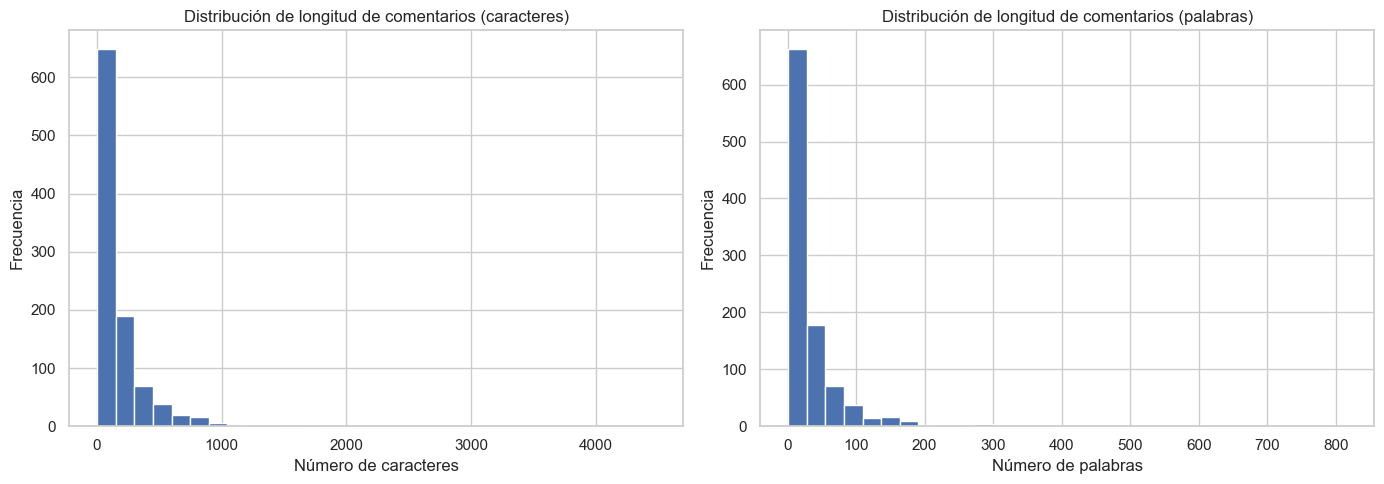


**Explicación de la salida:**

Los histogramas muestran cómo se distribuye la longitud de los comentarios:

- Podemos ver si la mayoría de los comentarios se concentran en longitudes bajas y unos pocos son muy largos.
- Permiten detectar valores extremos y entender el rango típico de longitud.

Esta información es útil, por ejemplo, para elegir un límite máximo de longitud para los modelos
o para inspeccionar manualmente comentarios muy largos o muy cortos.


In [28]:
# Paso 6: Plot histograms of comment length

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for character length
axes[0].hist(df["text_len"], bins=30)
axes[0].set_title("Distribución de longitud de comentarios (caracteres)")
axes[0].set_xlabel("Número de caracteres")
axes[0].set_ylabel("Frecuencia")

# Histogram for word count
axes[1].hist(df["word_count"], bins=30)
axes[1].set_title("Distribución de longitud de comentarios (palabras)")
axes[1].set_xlabel("Número de palabras")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

display(Markdown(
"""
**Explicación de la salida:**

Los histogramas muestran cómo se distribuye la longitud de los comentarios:

- Podemos ver si la mayoría de los comentarios se concentran en longitudes bajas y unos pocos son muy largos.
- Permiten detectar valores extremos y entender el rango típico de longitud.

Esta información es útil, por ejemplo, para elegir un límite máximo de longitud para los modelos
o para inspeccionar manualmente comentarios muy largos o muy cortos.
"""
))


## Paso 7: Distribución de las etiquetas de toxicidad y odio

El dataset contiene múltiples columnas de tipo `Is...`:

- `IsToxic`, `IsAbusive`, `IsThreat`, `IsObscene`, `IsHatespeech`, `IsRacist`, etc.

En esta celda:

- Identificaremos las columnas de etiquetas (las que empiezan por `Is`).
- Contaremos cuántos comentarios están marcados como True en cada una.
- Visualizaremos el resultado con un gráfico de barras.


IsToxic            462
IsAbusive          353
IsProvocative      161
IsHatespeech       138
IsRacist           125
IsObscene          100
IsThreat            21
IsReligiousHate     12
IsNationalist        8
IsSexist             1
IsHomophobic         0
IsRadicalism         0
dtype: int64

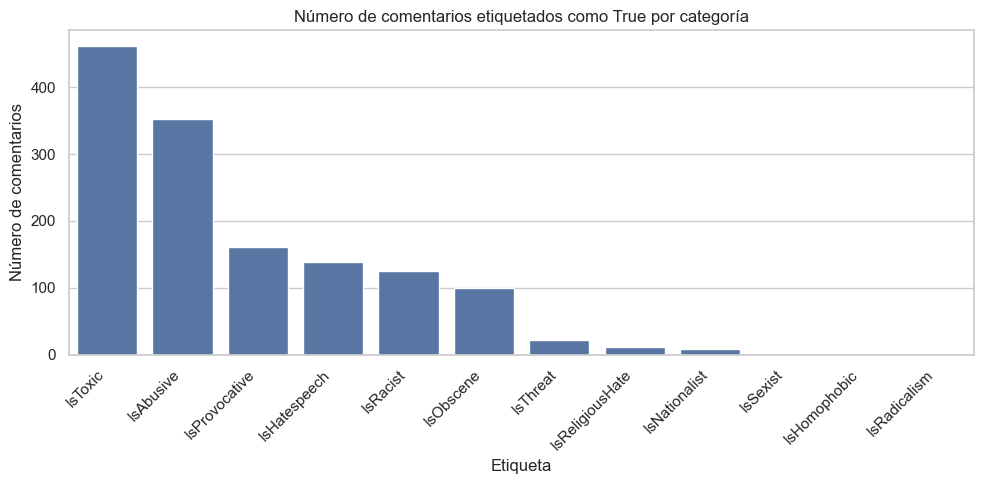


**Explicación de la salida:**

- La tabla muestra cuántos comentarios están marcados como `True` en cada etiqueta (`IsToxic`, `IsAbusive`, etc.).
- El gráfico de barras permite ver rápidamente qué categorías son más frecuentes.

Se observa que el dataset está **desbalanceado**:
- Algunas etiquetas tienen muchos ejemplos (p. ej. `IsToxic`, `IsAbusive`).
- Otras tienen muy pocos (p. ej. `IsSexist`, `IsRadicalism`, etc.).

Este desbalanceo es importante a la hora de entrenar modelos, porque afectará a las métricas
y puede requerir técnicas específicas (ponderación de clases, sampling, etc.).


In [29]:
# Paso 7: Distribution of toxicity/hate labels

# Select label columns (those starting with 'Is')
label_cols = [col for col in df.columns if col.startswith("Is")]

# Count positive cases (True) per label
label_counts = df[label_cols].sum().sort_values(ascending=False)

display(label_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Número de comentarios etiquetados como True por categoría")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Número de comentarios")
plt.xlabel("Etiqueta")
plt.tight_layout()
plt.show()

display(Markdown(
"""
**Explicación de la salida:**

- La tabla muestra cuántos comentarios están marcados como `True` en cada etiqueta (`IsToxic`, `IsAbusive`, etc.).
- El gráfico de barras permite ver rápidamente qué categorías son más frecuentes.

Se observa que el dataset está **desbalanceado**:
- Algunas etiquetas tienen muchos ejemplos (p. ej. `IsToxic`, `IsAbusive`).
- Otras tienen muy pocos (p. ej. `IsSexist`, `IsRadicalism`, etc.).

Este desbalanceo es importante a la hora de entrenar modelos, porque afectará a las métricas
y puede requerir técnicas específicas (ponderación de clases, sampling, etc.).
"""
))


## Paso 8: Relación entre longitud del comentario y toxicidad general (`IsToxic`)

Ahora vamos a:

- Comparar si hay alguna diferencia notable en la longitud de los comentarios entre:
  - Comentarios tóxicos (`IsToxic == True`)
  - Comentarios no tóxicos (`IsToxic == False`)
- Visualizarlo con un **boxplot** y estadísticas descriptivas por grupo.

Esto puede darnos pistas sobre si los comentarios tóxicos tienden a ser más cortos/largos.


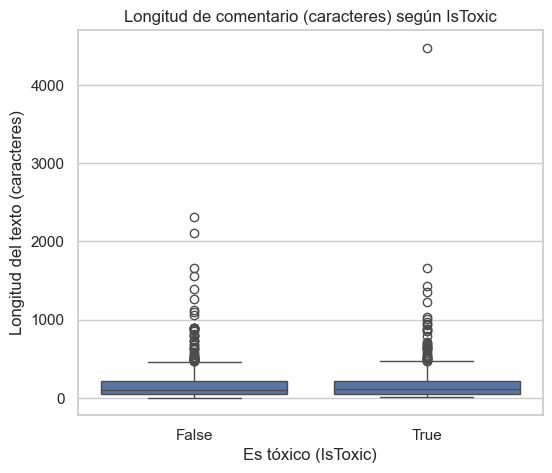

,count,mean,std,min,25%,50%,75%,max
IsToxic,,,,,,,,
False,538.0,182.665428,253.188905,3.0,44.00,96.5,211.00,2315.0
True,462.0,189.850649,293.198979,6.0,54.25,110.0,220.75,4474.0



**Explicación de la salida:**

- El boxplot compara la distribución de la longitud de los comentarios según sean tóxicos o no.
- La tabla de `describe()` por grupo muestra:
  - Media de longitud.
  - Valores mínimo, máximo y cuartiles por grupo (`IsToxic = False / True`).

Generalmente se observa que la longitud del texto no es el factor más determinante
para distinguir comentarios tóxicos de no tóxicos; la información más relevante estará
en el contenido léxico (palabras empleadas) que se explotará en la fase de modelado.


In [30]:
# Paso 8: Comment length by toxicity (IsToxic)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="IsToxic", y="text_len")
plt.title("Longitud de comentario (caracteres) según IsToxic")
plt.xlabel("Es tóxico (IsToxic)")
plt.ylabel("Longitud del texto (caracteres)")
plt.show()

# Descriptive stats per toxicity group
length_by_toxicity = df.groupby("IsToxic")["text_len"].describe()
display(length_by_toxicity)

display(Markdown(
"""
**Explicación de la salida:**

- El boxplot compara la distribución de la longitud de los comentarios según sean tóxicos o no.
- La tabla de `describe()` por grupo muestra:
  - Media de longitud.
  - Valores mínimo, máximo y cuartiles por grupo (`IsToxic = False / True`).

Generalmente se observa que la longitud del texto no es el factor más determinante
para distinguir comentarios tóxicos de no tóxicos; la información más relevante estará
en el contenido léxico (palabras empleadas) que se explotará en la fase de modelado.
"""
))


# Resumen del EDA

En este notebook hemos:

1. Cargado el dataset `youtoxic_english_1000.csv` y revisado su estructura.
2. Comprobado tipos de datos y ausencia de nulos relevantes en las columnas clave.
3. Analizado la longitud de los comentarios (caracteres y palabras) y sus distribuciones.
4. Estudiado la distribución de las etiquetas de toxicidad/odio y detectado un fuerte **desbalanceo**.
5. Comparado la longitud del texto en comentarios tóxicos y no tóxicos, viendo que la longitud,
   por sí sola, no parece el factor principal.

> No hemos aplicado tokenización, stopwords ni lematización en este EDA, ya que el objetivo aquí
> es entender los datos originales.  
> En el siguiente notebook (`4.2-preprocessing.ipynb`) definiremos el pipeline de preprocesamiento de texto
> para preparar los datos de cara a modelos clásicos (TF-IDF + clasificadores de ML).
